## Analysis of algorithms that make exact recovery of the cluster structure in GBM
Model description is [here](https://arxiv.org/pdf/1709.05510.pdf)

Candidate algorithms are: 
1. Motif-counting algorithm (from the above paper) and its modification from [here](https://arxiv.org/abs/1804.05013)
2. Spectral clustering with a smart choice of the optimal eigenvectors (k-means around optimal value)
3. Expansion algorithm described in my draft [here](https://www.overleaf.com/project/5e9483ae085e6600014af805)

Last update: 21/05/2020

### This notebook uses the classes.py file where principal classes and functions are defined

File classes.py is on autoreload

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
from classes_dense_GBM import GBM_graph, Motif_Counting, Motif_Counting_second_paper, Expansion_algorithm, Spectral_k_means, simulation, full_simulation, k_means_analysis
import tqdm
import time 
import warnings
import copy
warnings.filterwarnings("ignore")
%matplotlib inline

%load_ext autoreload
%autoreload 2

a = 0.06, b = 0.05, n = 2000, Expansion_algorithm = 51.0% (10sec), Motif_Counting = 50.0% (79sec), Motif_Counting_second_paper = 51.0% (84sec), Spectral_k_means = 58.0% (16sec), 
a = 0.06999999999999999, b = 0.05, n = 2000, Expansion_algorithm = 52.0% (18sec), Motif_Counting = 50.0% (92sec), Motif_Counting_second_paper = 51.0% (98sec), Spectral_k_means = 95.0% (9sec), 
a = 0.07999999999999999, b = 0.05, n = 2000, Expansion_algorithm = 57.0% (37sec), Motif_Counting = 50.0% (108sec), Motif_Counting_second_paper = 100.0% (116sec), Spectral_k_means = 99.0% (9sec), 
a = 0.08999999999999998, b = 0.05, n = 2000, Expansion_algorithm = 66.0% (79sec), Motif_Counting = 50.0% (121sec), Motif_Counting_second_paper = 100.0% (128sec), Spectral_k_means = 90.0% (10sec), 
a = 0.09999999999999998, b = 0.05, n = 2000, Expansion_algorithm = 94.0% (48sec), Motif_Counting = 50.0% (143sec), Motif_Counting_second_paper = 100.0% (149sec), Spectral_k_means = 100.0% (11sec), 
a = 0.10999999999999997, b = 0.05, n 

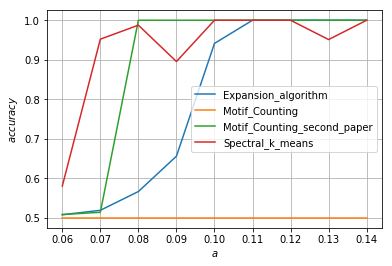

[{'a': 0.06,
  'Expansion_algorithm': 0.50795,
  'Motif_Counting': 0.49999999999999994,
  'Motif_Counting_second_paper': 0.50865,
  'Spectral_k_means': 0.5805500000000001},
 {'a': 0.06999999999999999,
  'Expansion_algorithm': 0.51925,
  'Motif_Counting': 0.49999999999999994,
  'Motif_Counting_second_paper': 0.51415,
  'Spectral_k_means': 0.9520999999999998},
 {'a': 0.07999999999999999,
  'Expansion_algorithm': 0.56675,
  'Motif_Counting': 0.49999999999999994,
  'Motif_Counting_second_paper': 0.9999999999999999,
  'Spectral_k_means': 0.9874999999999999},
 {'a': 0.08999999999999998,
  'Expansion_algorithm': 0.6561,
  'Motif_Counting': 0.49999999999999994,
  'Motif_Counting_second_paper': 0.9999999999999999,
  'Spectral_k_means': 0.8955499999999998},
 {'a': 0.09999999999999998,
  'Expansion_algorithm': 0.9414,
  'Motif_Counting': 0.49999999999999994,
  'Motif_Counting_second_paper': 0.9999999999999999,
  'Spectral_k_means': 0.9999999999999999},
 {'a': 0.10999999999999997,
  'Expansion_alg

In [2]:
full_simulation([Expansion_algorithm, Motif_Counting, Motif_Counting_second_paper, Spectral_k_means], 
                b = 0.05, 
                a_start = 0.06, 
                a_finish = 0.16, 
                a_step = 0.01, 
                n_1 = 1000, 
                n_2 = 1000,
                n_trials = 10)

a = 0.06, b = 0.05, n = 4000, Expansion_algorithm = 51.0% (61sec), Motif_Counting_second_paper = 51.0% (756sec), Spectral_k_means = 77.0% (61sec), 
a = 0.06999999999999999, b = 0.05, n = 4000, Expansion_algorithm = 55.0% (144sec), Motif_Counting_second_paper = 51.0% (874sec), Spectral_k_means = 100.0% (47sec), 
a = 0.07999999999999999, b = 0.05, n = 4000, Expansion_algorithm = 85.0% (400sec), Motif_Counting_second_paper = 70.0% (1012sec), Spectral_k_means = 100.0% (51sec), 
a = 0.08999999999999998, b = 0.05, n = 4000, Expansion_algorithm = 100.0% (145sec), Motif_Counting_second_paper = 100.0% (1153sec), Spectral_k_means = 89.0% (55sec), 
a = 0.09999999999999998, b = 0.05, n = 4000, Expansion_algorithm = 100.0% (162sec), Motif_Counting_second_paper = 100.0% (1231sec), Spectral_k_means = 100.0% (54sec), 
a = 0.10999999999999997, b = 0.05, n = 4000, Expansion_algorithm = 100.0% (186sec), Motif_Counting_second_paper = 100.0% (1374sec), Spectral_k_means = 100.0% (60sec), 
a = 0.119999999999

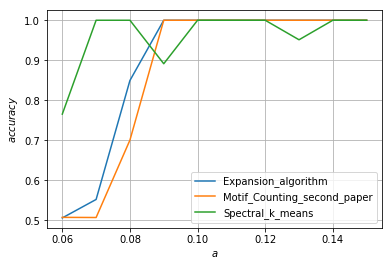

In [3]:
fs_2000 = full_simulation([Expansion_algorithm, Motif_Counting_second_paper, Spectral_k_means], 
                b = 0.05, 
                a_start = 0.06, 
                a_finish = 0.16, 
                a_step = 0.01, 
                n_1 = 2000, 
                n_2 = 2000,
                n_trials = 10)

In [12]:
G = GBM_graph(n_1 = 1000, n_2 = 1000, a = 0.08, b = 0.05, disp = False)

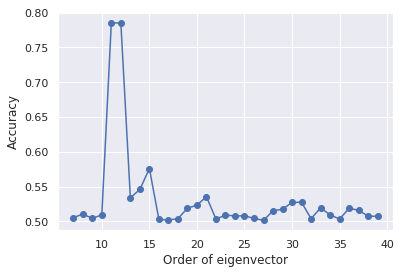

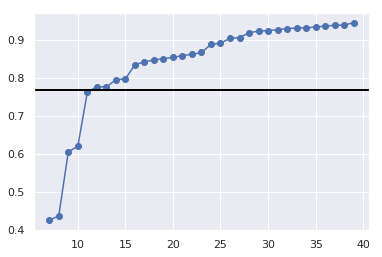

In [13]:
k_means_analysis(G, vectors = [], vectors_disp=True)

In [14]:
G = GBM_graph(n_1 = 2000, n_2 = 2000, a = 0.08, b = 0.05, disp = False)

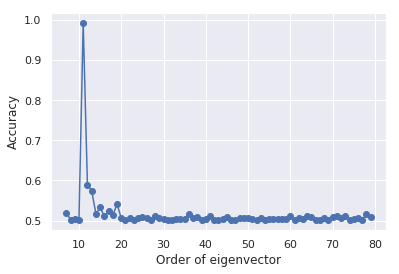

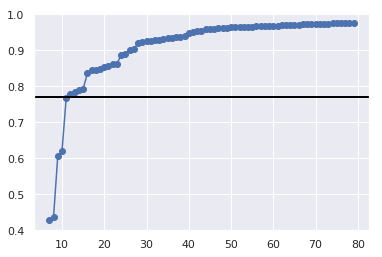

In [15]:
k_means_analysis(G, vectors = [], vectors_disp=True)

In [16]:
G = GBM_graph(n_1 = 4000, n_2 = 4000, a = 0.08, b = 0.05, disp = False)

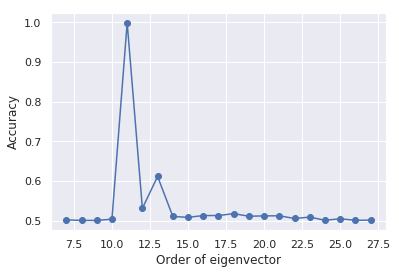

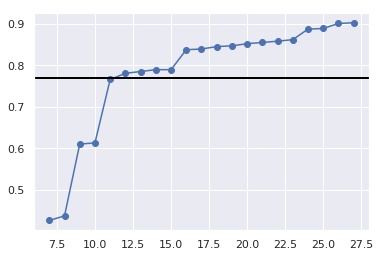

In [19]:
k_means_analysis(G, vectors = [], vectors_disp=True)

In [20]:
np.sqrt(0.075)

0.27386127875258304

In [26]:
import scipy
def interval_u(x):
    return np.exp(scipy.special.lambertw((1/x-1)/np.exp(1)) + 1)

In [27]:
n = G.number_of_nodes()
2*G.b*interval_u(2*G.b)*np.log(n)

(922.8743472625398+0j)

In [46]:
G = GBM_graph(n_1 = 4000, n_2 = 4000, a = 0.08, b = 0.05, disp = True)

average degree inside: 640.0
average degree outside: 400.0


In [47]:
e = Expansion_algorithm(G)
e.accuracy

(922.8743472625398+0j)
Number of components: 2


1.0

In [29]:
full_simulation([Expansion_algorithm, Spectral_k_means], 
                b = 0.05, 
                a_start = 0.06, 
                a_finish = 0.11, 
                a_step = 0.01, 
                n_1 = 1000, 
                n_2 = 1000,
                n_trials = 10)

a = 0.06, b = 0.05, n = 2000, Expansion_algorithm = 52.0% (44sec), Spectral_k_means = 62.0% (31sec), 
a = 0.06999999999999999, b = 0.05, n = 2000, Expansion_algorithm = 57.0% (102sec), Spectral_k_means = 95.0% (17sec), 
a = 0.07999999999999999, b = 0.05, n = 2000, Expansion_algorithm = 58.0% (58sec), Spectral_k_means = 100.0% (18sec), 
a = 0.08999999999999998, b = 0.05, n = 2000, Expansion_algorithm = 70.0% (35sec), Spectral_k_means = 98.0% (20sec), 


KeyboardInterrupt: 

a = 0.06, b = 0.05, n = 8000, Expansion_algorithm = 51.0% (445sec), Spectral_k_means = 95.0% (355sec), 
a = 0.06999999999999999, b = 0.05, n = 8000, Expansion_algorithm = 78.0% (1667sec), Spectral_k_means = 100.0% (380sec), 
a = 0.07999999999999999, b = 0.05, n = 8000, Expansion_algorithm = 100.0% (729sec), Spectral_k_means = 100.0% (399sec), 
a = 0.08999999999999998, b = 0.05, n = 8000, Expansion_algorithm = 100.0% (811sec), Spectral_k_means = 100.0% (409sec), 
a = 0.09999999999999998, b = 0.05, n = 8000, Expansion_algorithm = 100.0% (958sec), Spectral_k_means = 100.0% (454sec), 


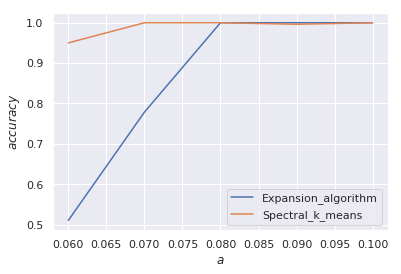

In [49]:
fs_4000 = full_simulation([Expansion_algorithm, Spectral_k_means], 
                b = 0.05, 
                a_start = 0.06, 
                a_finish = 0.11, 
                a_step = 0.01, 
                n_1 = 4000, 
                n_2 = 4000,
                n_trials = 10)